In [1]:
import sys
import os

thesis_path = "/" + os.path.join(
    *os.getcwd().split(os.path.sep)[:-1])
sys.path.append(thesis_path)


In [2]:
from evaluations.performance_01 import get_per_sample_metrics
from evaluations.utils import get_correct_latex_format
metrics_df = get_per_sample_metrics()

/home/loebbert/miniconda3/envs/haystack/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
metrics_df.head()

,seed,model,checkpoint,dataset,doc_id,targets,entity_type,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
0,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,location,0,0,0,0,0,0,0,0
1,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,group,0,0,0,0,0,0,0,0
2,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,corporation,0,0,0,0,0,0,0,0
3,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,person,0,0,0,0,0,0,0,0
4,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,creative-work,0,0,1,1,0,0,0,0


In [4]:
metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30875400 entries, 0 to 30875399
Data columns (total 15 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   seed         object
 1   model        object
 2   checkpoint   object
 3   dataset      object
 4   doc_id       object
 5   targets      int64 
 6   entity_type  object
 7   tp           int64 
 8   fn           int64 
 9   fp           int64 
 10  error_type1  int64 
 11  error_type2  int64 
 12  error_type3  int64 
 13  error_type4  int64 
 14  error_type5  int64 
dtypes: int64(9), object(6)
memory usage: 3.5+ GB


In [5]:
metrics_df.describe()

,targets,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
count,3.087540e+07,3.087540e+07,3.087540e+07,3.087540e+07,3.087540e+07,3.087540e+07,3.087540e+07,3.087540e+07,3.087540e+07
mean,2.161282e-01,1.462266e-01,6.990154e-02,2.636537e-01,2.366940e-01,4.699852e-02,5.773723e-03,1.037337e-02,1.091516e-02
std,5.983969e-01,4.874700e-01,3.165672e-01,8.694029e-01,8.375496e-01,2.641294e-01,7.894163e-02,1.105230e-01,1.179668e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,1.200000e+01,1.200000e+01,2.300000e+01,2.300000e+01,1.200000e+01,7.000000e+00,7.000000e+00,1.100000e+01


# Model performance
## Micro-F1 + 5 Error Types avg+std

In [6]:
# Micro - F1
from evaluations.performance_01 import get_micro_f1_precision_recall
result = get_micro_f1_precision_recall(metrics_df, "last", "lowner_test")
result

model checkpoint      dataset         f1            \
                                                               mean       std   
4                 dict_match_gaz       last  lowner_test  28.573637  0.007001   
10           dict_match_gaz_sent       last  lowner_test  29.404060  0.045085   
16          dict_match_lownergaz       last  lowner_test  20.773579  0.019751   
22     dict_match_lownergaz_sent       last  lowner_test  21.611711  0.012736   
28               dict_match_sent       last  lowner_test  29.028146  0.009593   
34                 flair_roberta       last  lowner_test  84.064658  0.110460   
40              search_match_gaz       last  lowner_test  37.168811  0.018344   
46         search_match_gaz_sent       last  lowner_test  43.190684  0.019899   
52        search_match_lownergaz       last  lowner_test  50.239811  0.038783   
58   search_match_lownergaz_sent       last  lowner_test  59.462562  0.010283   
64             search_match_sent       last  lowner_test  37.187504  0.004034   
70                        t5_asp       last  lowner_test  85.481521  0.163211   
76                    t5_asp_gaz       last  lowner_test  86.515093  1.373751   
82               t5_asp_gaz_sent       last  lowner_test  88.478024  0.122478   
88              t5_asp_lownergaz       last  lowner_test  87.478254  2.444407   
94         t5_asp_lownergaz_sent       last  lowner_test  89.600103  0.029477   
100                  t5_asp_sent       last  lowner_test  86.724683  0.218033   

     precision               recall            
          mean       std       mean       std  
4    20.357842  0.004988  47.907707  0.011738  
10   20.949493  0.032122  49.300027  0.075591  
16   11.898689  0.011313  81.744289  0.077719  
22   12.376276  0.007294  85.159514  0.050186  
28   20.691513  0.006838  48.615305  0.016067  
34   82.972975  0.316572  85.186202  0.112832  
40   35.845302  0.017691  38.593802  0.019047  
46   43.988235  0.020266  42.421539  0.019544  
52   44.945538  0.034696  56.947876  0.043961  
58   59.281405  0.010252  59.644829  0.010315  
64   78.635446  0.008529  24.351877  0.002641  
70   86.982432  0.295482  84.031781  0.061052  
76   88.825027  0.325854  84.359655  2.830382  
82   89.540748  0.150150  87.440906  0.310630  
88   90.383760  0.077121  84.831641  4.507486  
94   90.848639  0.268918  88.386403  0.255862  
100  88.775777  0.208632  84.766828  0.357262

In [7]:
print(get_correct_latex_format(result, ["f1", "precision", "recall"], {"f1": "Micro-F1", "precision": "Precision", "recall": "Recall"}))

\begin{tabular}{llll}
\toprule
{} &     Micro-F1 &   Precision &       Recall \\
\textbf{Models                                   } &              &             &              \\
\midrule
\textbf{FLAIR\textsubscript{RoBERTa-Large}       } &   84.06 (11) &  82.97 (32) &   85.19 (11) \\
\textbf{T5-ASP                                   } &   85.48 (16) &  86.98 (30) &    84.03 (6) \\
\textbf{DictMatch\textsubscript{Gaz}             } &    28.57 (1) &   20.36 (0) &    47.91 (1) \\
\textbf{DictMatch\textsubscript{Sent}            } &    29.03 (1) &   20.69 (1) &    48.62 (2) \\
\textbf{DictMatch\textsubscript{LownerGaz}       } &    20.77 (2) &   11.90 (1) &    81.74 (8) \\
\textbf{DictMatch\textsubscript{Gaz+Sent}        } &    29.40 (5) &   20.95 (3) &    49.30 (8) \\
\textbf{DictMatch\textsubscript{LownerGaz+Sent}  } &    21.61 (1) &   12.38 (1) &    85.16 (5) \\
\textbf{SearchMatch\textsubscript{Gaz}           } &    37.17 (2) &   35.85 (2) &    38.59 (2) \\
\textbf{SearchMatch\textsubs

/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:116: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [4]:
from evaluations.performance_01 import get_recall

get_recall(metrics_df, "last", "lowner_test").sort_values(("recall", "mean"),
                                                          ascending=False)


model checkpoint      dataset     recall          
                                                            mean       std
52      t5_asp_lownergaz_sent       last  lowner_test  88.386403  0.255862
40            t5_asp_gaz_sent       last  lowner_test  87.440906  0.310630
22              flair_roberta       last  lowner_test  85.186202  0.112832
46           t5_asp_lownergaz       last  lowner_test  84.831641  4.507486
58                t5_asp_sent       last  lowner_test  84.766828  0.357262
34                 t5_asp_gaz       last  lowner_test  84.359655  2.830382
28                     t5_asp       last  lowner_test  84.031781  0.061052
16            dict_match_sent       last  lowner_test   2.652728  0.018490
10  dict_match_lownergaz_sent       last  lowner_test   1.874981  0.026709
4        dict_match_lownergaz       last  lowner_test   1.804831  0.030775

In [3]:
# 5 Error types
from evaluations.performance_01 import get_error_types
error_result = get_error_types(metrics_df, "last", "lowner_test")
print(get_correct_latex_format(error_result, [
    "error_type1",
    "error_type2",
    "error_type3",
    "error_type4",
    "error_type5",
    "sum"
                                              ], {
    "error_type1": "Type-1",
    "error_type2": "Type-2",
    "error_type3": "Type-3",
    "error_type4": "Type-4",
    "error_type5": "Type-5",
    "sum": "Sum"
                                              }))

\begin{tabular}{lllllll}
\toprule
{} &            Type-1 &             Type-2 &           Type-3 &           Type-4 &           Type-5 &                Sum \\
\textbf{Models                                   } &                   &                    &                  &                  &                  &                    \\
\midrule
\textbf{FLAIR\textsubscript{RoBERTa-Large}       } &  2,933.67 (10335) &   2,118.00 (11268) &  1,527.00 (2563) &    683.00 (2685) &  2,550.67 (3317) &    9,812.33 (8082) \\
\textbf{T5-ASP                                   } &   1,652.67 (7151) &    3,078.00 (6031) &   1,595.00 (458) &    492.00 (1637) &  1,840.67 (5652) &   8,658.33 (10433) \\
\textbf{DictMatch\textsubscript{Gaz}             } &     68,177.00 (0) &      11,740.00 (0) &   1,802.67 (513) &  7,315.67 (1804) &  4,639.33 (1804) &    93,674.67 (513) \\
\textbf{DictMatch\textsubscript{Sent}            } &     68,148.00 (0) &      11,926.00 (0) &   1,149.33 (702) &  7,287.00 (1873) &  4,877.0

/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:116: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


## Macro F1 + errors by entity type

In [8]:
from evaluations.performance_01 import get_f1_per_entity

entity_results = get_f1_per_entity(metrics_df, "last", "lowner_test")


In [9]:
print(get_correct_latex_format(entity_results.swaplevel(1, 2, axis=1), ["corporation", "creative-work", "group", "location", "person", "product"], {"f1": "Micro-F1"}))

\begin{tabular}{lllllll}
\toprule
{} &       Person &    Location &        Group &  Corporation & Creative Work &      Product \\
\textbf{Models                                   } &              &             &              &              &               &              \\
\midrule
\textbf{FLAIR\textsubscript{RoBERTa-Large}       } &   91.64 (26) &  89.35 (10) &   78.79 (17) &   70.74 (43) &     67.00 (6) &   50.64 (97) \\
\textbf{T5-ASP                                   } &    94.28 (3) &  87.93 (27) &   79.99 (17) &   75.11 (46) &    71.65 (10) &   44.78 (52) \\
\textbf{DictMatch\textsubscript{Gaz}             } &    44.63 (8) &   42.66 (8) &    35.73 (3) &    32.69 (8) &      8.59 (3) &   15.58 (10) \\
\textbf{DictMatch\textsubscript{Sent}            } &    43.49 (8) &   44.13 (7) &    36.67 (8) &   33.02 (10) &      8.49 (3) &    15.52 (1) \\
\textbf{DictMatch\textsubscript{LownerGaz}       } &    50.06 (8) &   25.55 (8) &   26.29 (10) &   33.65 (18) &      5.54 (0) &   15.90 (22) 

/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:116: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [3]:
from evaluations.performance_01 import get_error_types_per_entity

get_error_types_per_entity(metrics_df, "last", "lowner_test").flatten

entity_type                  model checkpoint      dataset corporation  \
                                                                  mean   
                                                           error_type1   
4                           t5_asp       last  lowner_test   75.333333   
10                      t5_asp_gaz       last  lowner_test   98.666667   
16                 t5_asp_gaz_sent       last  lowner_test   88.666667   
22                t5_asp_lownergaz       last  lowner_test   81.000000   
28           t5_asp_lownergaz_sent       last  lowner_test   87.000000   
34                     t5_asp_sent       last  lowner_test   76.000000   

entity_type             creative-work                   group              \
                    std          mean         std        mean         std   
            error_type1   error_type1 error_type1 error_type1 error_type1   
4              4.725816    415.000000   15.132746  233.000000    8.660254   
10             4.163332    414.333333    4.041452  205.333333   25.501634   
16             6.658328    458.000000   24.515301  208.666667    9.237604   
22             7.211103    377.666667   53.425961  185.666667   21.594752   
28             2.645751    385.333333   15.567059  186.666667   23.158872   
34             3.464102    396.666667   30.353473  191.333333   20.599353   

entity_type    location  ... creative-work                   group  \
                   mean  ...          mean         std        mean   
            error_type1  ...   error_type5 error_type5 error_type5   
4            375.666667  ...    326.666667   11.676187  304.333333   
10           356.666667  ...    258.666667   10.016653  258.666667   
16           387.000000  ...    273.666667   18.770544  243.666667   
22           359.000000  ...    198.000000   13.453624  211.333333   
28           369.666667  ...    182.333333   16.921387  200.000000   
34           315.333333  ...    269.000000   10.000000  277.666667   

entity_type                location                  person              \
                    std        mean         std        mean         std   
            error_type5 error_type5 error_type5 error_type5 error_type5   
4              8.020806  937.000000   45.574115  173.666667    2.886751   
10            22.479620  892.333333   28.746014  172.333333    8.082904   
16             4.163332  843.000000    2.000000  166.666667   14.011900   
22            12.858201  700.333333   17.616280  128.000000    7.810250   
28             5.291503  682.333333   11.930353  129.000000    7.549834   
34             5.131601  855.666667   18.475209  169.000000    8.544004   

entity_type     product              
                   mean         std  
            error_type5 error_type5  
4             43.000000    5.000000  
10            28.000000    4.000000  
16            31.333333    0.577350  
22            31.666667    0.577350  
28            32.666667    5.859465  
34            32.333333    2.081666  

[6 rows x 63 columns]

## EECR + ECR for labeled data + search results

In [2]:
# EECR - labeled data
from evaluations.performance_01 import get_labeled_data_entity_coverage

labeled_data_eecr_df = get_labeled_data_entity_coverage()
labeled_data_eecr_df.sort_values("eecr", ascending=False)


,model,dataset,eecr,ρ=1,"ρ ∈ (0.5,1)","ρ ∈ (0,0.5]",ρ=0∧C≠0,ρ=0∧C=0
7,t5_asp_lownergaz_sent,lowner_dev,0.871725,2953,359,141,43,317
6,t5_asp_lownergaz_sent,lowner_train,0.871400,10760,949,545,140,1161
8,t5_asp_lownergaz_sent,lowner_test,0.869790,24448,1765,1180,339,2807
0,t5_asp_lownergaz,lowner_train,0.838219,10742,611,862,157,1183
2,t5_asp_lownergaz,lowner_test,0.834924,24403,1119,1790,360,2867
1,t5_asp_lownergaz,lowner_dev,0.832973,2947,215,280,46,325
14,t5_asp_sent,lowner_test,0.487843,10346,350,211,391,19241
11,t5_asp_gaz_sent,lowner_test,0.486827,10346,349,212,391,19241
12,t5_asp_sent,lowner_train,0.484656,5060,223,106,174,7992
13,t5_asp_sent,lowner_dev,0.484016,1565,79,38,44,2087


In [4]:
# EECR - labeled data - per sample eecr
from evaluations.performance_01 import get_labeled_data_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics
from evaluations.utils import get_correct_latex_format

labeled_data_eecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_eecr_sample_df = aggregate_per_sample_eecr_metrics(labeled_data_eecr_sample_df)
print(get_correct_latex_format(agg_labeled_data_eecr_sample_df[agg_labeled_data_eecr_sample_df["dataset"]=="lowner_test"], ["eecr"], {"eecr": "EECR"}, 4))

\begin{tabular}{ll}
\toprule
{} &           EECR \\
\textbf{Models                              } &                \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &  0.3852 (4431) \\
\textbf{T5-ASP\textsubscript{Sent}          } &  0.3968 (4513) \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &  0.7056 (4105) \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &  0.3960 (4504) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &  0.7330 (4083) \\
\bottomrule
\end{tabular}



/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:116: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [4]:
# EECR - search results - per sample eecr
from evaluations.performance_01 import get_search_results_entity_coverage_per_sample, aggregate_per_sample_eecr_metrics

search_results_data_eecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_eecr = aggregate_per_sample_eecr_metrics(search_results_data_eecr)
print(get_correct_latex_format(agg_search_results_data_eecr[agg_search_results_data_eecr["dataset"]=="lowner_test"], ["eecr"], {"eecr": "EECR"}, 4))

\begin{tabular}{ll}
\toprule
{} &           EECR \\
\textbf{Models                              } &                \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &  0.3219 (4275) \\
\textbf{T5-ASP\textsubscript{Sent}          } &  0.2045 (3748) \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &  0.5188 (4633) \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &  0.3334 (4319) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &  0.5371 (4595) \\
\bottomrule
\end{tabular}



/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:104: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [7]:
from evaluations.utils import get_correct_latex_format
from evaluations.performance_01 import get_entity_coverages

test_eecr_table = get_entity_coverages("lowner_test")

print(get_correct_latex_format(test_eecr_table, ["eecr_labeled_data", "eecr_labeled_data_per_sample", "eecr_search_results"], {"eecr_labeled_data": "EECR labeled data", "eecr_labeled_data_per_sample": "EECR labeled data per sample", "eecr_search_results": "EECR search results per sample"}))

\begin{tabular}{llll}
\toprule
{} & EECR labeled data & EECR labeled data per sample & EECR search results per sample \\
\textbf{Models                              } &                   &                              &                                \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &            0.4730 &                       0.3852 &                         0.3219 \\
\textbf{T5-ASP\textsubscript{Sent}          } &            0.4878 &                       0.3968 &                         0.2045 \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &            0.8349 &                       0.7056 &                         0.5188 \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &            0.4868 &                       0.3960 &                         0.3334 \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &            0.8698 &                       0.7330 &                         0.5371 \\
\bottomrule
\end{tabular}



/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:90: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


## ECR - bar charts

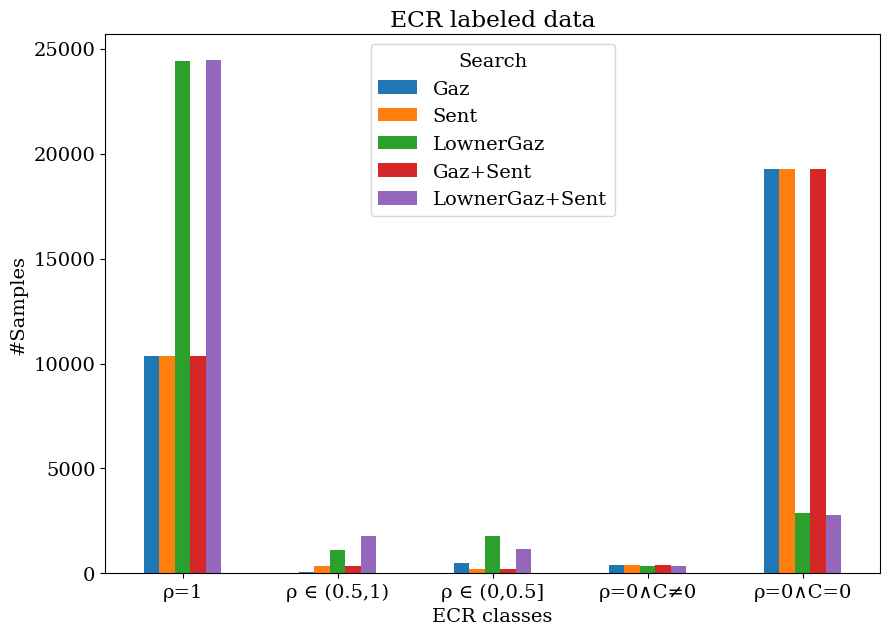

In [3]:
# ECR - labeled data - 5 classes
from evaluations.performance_01 import get_labeled_data_entity_coverage, get_ecr_plotable_table
import matplotlib.pyplot as plt

# plt.rcParams.update({
#     'mathtext.default': 'regular',
#     "mathtext.fontset":"cm",
#     "font.family": "serif",
#     "font.size": 14
# })

labeled_data_ecr_df = get_labeled_data_entity_coverage()
LATEX_THESIS_PATH = "/Users/robinloebbert/OneDrive/Studium/Master/Masterarbeit/Thesis"

get_ecr_plotable_table(labeled_data_ecr_df, "lowner_test").plot(kind="bar", figsize=(10, 7), title="ECR labeled data", ylabel="#Samples", xlabel="ECR classes", rot=0.0)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "ecr_labeled_data.png"), dpi=300, bbox_inches='tight')

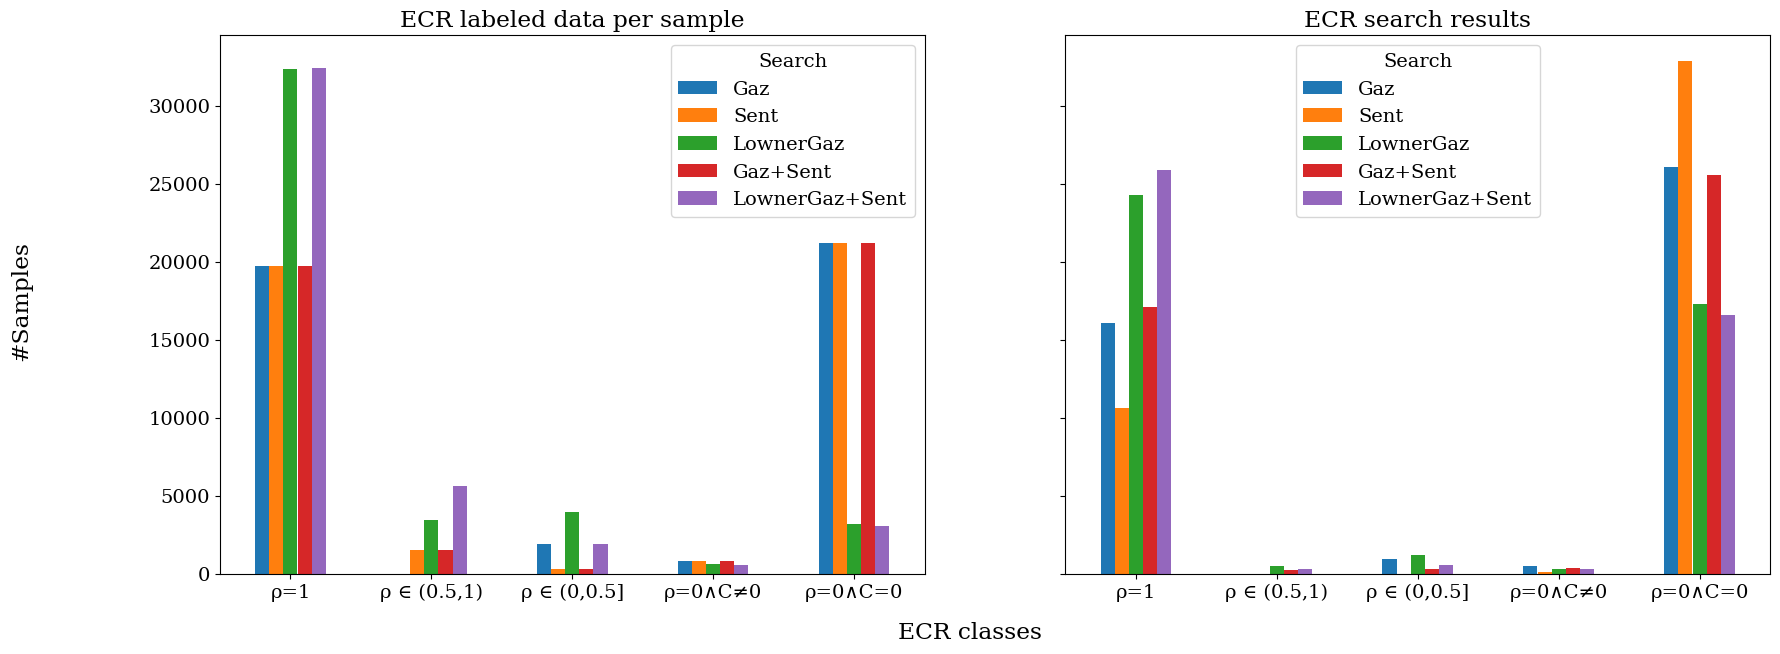

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))
fig.supylabel("#Samples")
fig.supxlabel("ECR classes")
from evaluations.performance_01 import aggregate_per_sample_ecr_classes, get_labeled_data_entity_coverage_per_sample, get_ecr_plotable_table

labeled_data_ecr_sample_df = get_labeled_data_entity_coverage_per_sample()
agg_labeled_data_ecr_sample_df = aggregate_per_sample_ecr_classes(labeled_data_ecr_sample_df)

get_ecr_plotable_table(agg_labeled_data_ecr_sample_df, "lowner_test").plot(kind="bar", ax=axs[0], title="ECR labeled data per sample", rot=0)
#plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "ecr_labeled_data_per_sample.png"), dpi=300)
from evaluations.performance_01 import get_search_results_entity_coverage_per_sample, aggregate_per_sample_ecr_classes

search_results_data_ecr = get_search_results_entity_coverage_per_sample()
agg_search_results_data_ecr = aggregate_per_sample_ecr_classes(search_results_data_ecr)

get_ecr_plotable_table(agg_search_results_data_ecr, "lowner_test").plot(kind="bar", ax=axs[1], title="ECR search results", rot=0)
plt.savefig(os.path.join(LATEX_THESIS_PATH, "drawings", "01_performance", "ecr_per_sample.png"), dpi=300, bbox_inches='tight')

## Context Coverage Ratio

In [29]:
# CCR search results

from evaluations.performance_01 import get_search_results_data_ccr_metrics

df = get_search_results_data_ccr_metrics()
df["score"] = df["total entities"] * df["search score"]
df["entity score"] = df["total entities"] * df["score"]
df.head()

,model,dataset,doc_id,total entities,search score,max,"φ ∈ (0.5,1]","φ ∈ (0,0.5]","φ ∈ (-0.5,0]","φ ∈ [-1,-0.5]",score,entity score
0,t5_asp_lownergaz,lowner_test,lowner_test_0,12,0.164898,0.444935,0,12,0,0,1.978779,23.745347
1,t5_asp_lownergaz,lowner_test,lowner_test_1,12,0.192069,0.639595,1,11,0,0,2.304824,27.657884
2,t5_asp_lownergaz,lowner_test,lowner_test_2,12,0.244841,0.318542,0,12,0,0,2.938096,35.257153
3,t5_asp_lownergaz,lowner_test,lowner_test_3,12,0.086775,0.376024,0,11,1,0,1.041297,12.495570
4,t5_asp_lownergaz,lowner_test,lowner_test_4,12,0.151975,0.346099,0,12,0,0,1.823706,21.884467


In [30]:
agg_df = df.pivot_table(values=["total entities", "score", "max", "entity score"], index=["model", "dataset"], aggfunc=["mean", "std"])

In [31]:
agg_df = agg_df.sort_index(axis=1, level=1).swaplevel(0, 1, axis=1).reset_index()
agg_df

model       dataset entity score                  max  \
                                                mean        std      mean   
0              t5_asp_gaz    lowner_dev    29.393014  16.139468  0.420403   
1              t5_asp_gaz   lowner_test    29.192221  15.949046  0.420175   
2              t5_asp_gaz  lowner_train    29.008637  15.866182  0.419051   
3         t5_asp_gaz_sent    lowner_dev    49.174463  53.393152  0.629744   
4         t5_asp_gaz_sent   lowner_test    49.225194  53.300556  0.630119   
5         t5_asp_gaz_sent  lowner_train    49.230722  51.372391  0.629078   
6        t5_asp_lownergaz    lowner_dev    37.548190  20.090790  0.467578   
7        t5_asp_lownergaz   lowner_test    37.603609  19.898646  0.468299   
8        t5_asp_lownergaz  lowner_train    37.350981  19.840839  0.465307   
9   t5_asp_lownergaz_sent    lowner_dev    51.581367  53.435040  0.639802   
10  t5_asp_lownergaz_sent   lowner_test    51.782107  53.564177  0.639273   
11  t5_asp_lownergaz_sent  lowner_train    51.757315  51.773669  0.637648   
12            t5_asp_sent    lowner_dev    53.780845  75.631077  0.626621   
13            t5_asp_sent   lowner_test    55.154603  84.435647  0.626859   
14            t5_asp_sent  lowner_train    55.583070  84.191704  0.625997   

                 score           total entities            
         std      mean       std           mean       std  
0   0.147701  2.450596  1.344210      11.985146  0.360476  
1   0.148764  2.433529  1.328628      11.985295  0.379343  
2   0.148896  2.418261  1.322005      11.988229  0.334093  
3   0.117333  4.466744  2.165394       9.832442  2.698935  
4   0.119587  4.462004  2.192157       9.836339  2.707055  
5   0.119529  4.461907  2.178241       9.847799  2.702726  
6   0.165765  3.129016  1.674233      11.996435  0.206835  
7   0.163981  3.133880  1.658111      11.995484  0.217431  
8   0.163835  3.112701  1.653323      11.998436  0.111534  
9   0.117645  4.715671  2.178586       9.833333  2.699595  
10  0.119954  4.725626  2.210299       9.836517  2.705507  
11  0.119786  4.719591  2.201946       9.848618  2.702979  
12  0.117516  5.113561  2.715355       8.719846  3.641955  
13  0.119601  5.143407  2.860364       8.762901  3.787111  
14  0.119464  5.155388  2.880487       8.788572  3.826185

In [32]:
agg_df[agg_df["dataset"]=="lowner_test"]

model      dataset entity score                  max  \
                                               mean        std      mean   
1              t5_asp_gaz  lowner_test    29.192221  15.949046  0.420175   
4         t5_asp_gaz_sent  lowner_test    49.225194  53.300556  0.630119   
7        t5_asp_lownergaz  lowner_test    37.603609  19.898646  0.468299   
10  t5_asp_lownergaz_sent  lowner_test    51.782107  53.564177  0.639273   
13            t5_asp_sent  lowner_test    55.154603  84.435647  0.626859   

                 score           total entities            
         std      mean       std           mean       std  
1   0.148764  2.433529  1.328628      11.985295  0.379343  
4   0.119587  4.462004  2.192157       9.836339  2.707055  
7   0.163981  3.133880  1.658111      11.995484  0.217431  
10  0.119954  4.725626  2.210299       9.836517  2.705507  
13  0.119601  5.143407  2.860364       8.762901  3.787111

In [27]:
from evaluations.utils import get_correct_latex_format

print(get_correct_latex_format(agg_df[agg_df["dataset"]=="lowner_test"], ["max", "score", "total entities"], {"max": "Top-1 Cosine Similarity", "score": "Score", "total entities": "Entity count"}))

\begin{tabular}{llll}
\toprule
{} & Top-1 Cosine Similarity &       Score & Entity count \\
\textbf{Models                              } &                         &             &              \\
\midrule
\textbf{T5-ASP\textsubscript{Gaz}           } &               0.42 (15) &  2.43 (133) &   11.99 (38) \\
\textbf{T5-ASP\textsubscript{Sent}          } &               0.63 (12) &  5.14 (286) &   8.76 (379) \\
\textbf{T5-ASP\textsubscript{LownerGaz}     } &               0.47 (16) &  3.13 (166) &   12.00 (22) \\
\textbf{T5-ASP\textsubscript{Gaz+Sent}      } &               0.63 (12) &  4.46 (219) &   9.84 (271) \\
\textbf{T5-ASP\textsubscript{LownerGaz+Sent}} &               0.64 (12) &  4.73 (221) &   9.84 (271) \\
\bottomrule
\end{tabular}



/Users/robinloebbert/Masterarbeit/thesis/evaluations/utils.py:105: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return result_df.to_latex(bold_rows=True, escape=False)


In [8]:
df[df["model"] == "t5_asp_sent"]

,model,dataset,doc_id,total entities,search score,max,"φ ∈ (0.5,1]","φ ∈ (0,0.5]","φ ∈ (-0.5,0]","φ ∈ [-1,-0.5]",score
201800,t5_asp_sent,lowner_test,lowner_test_0,7,0.419587,0.476611,0,6,0,0,2.937111
201801,t5_asp_sent,lowner_test,lowner_test_1,7,0.534756,0.561976,6,0,0,0,3.743293
201802,t5_asp_sent,lowner_test,lowner_test_2,11,0.502550,0.532368,3,3,0,0,5.528047
201803,t5_asp_sent,lowner_test,lowner_test_3,9,0.455447,0.487919,0,6,0,0,4.099022
201804,t5_asp_sent,lowner_test,lowner_test_4,7,0.611039,0.625397,6,0,0,0,4.277272
...,...,...,...,...,...,...,...,...,...,...,...
252245,t5_asp_sent,lowner_dev,lowner_dev_3361,6,0.479686,0.499372,0,6,0,0,2.878114
252246,t5_asp_sent,lowner_dev,lowner_dev_3362,9,0.509035,0.594135,3,3,0,0,4.581311
252247,t5_asp_sent,lowner_dev,lowner_dev_3363,6,0.797964,0.834946,6,0,0,0,4.787785
252248,t5_asp_sent,lowner_dev,lowner_dev_3364,13,0.884568,0.895136,6,0,0,0,11.499381


In [10]:
from evaluations.performance_01 import get_search_results_data_ccr_max

max_ccr_search_df = get_search_results_data_ccr_max()
max_ccr_search_df[max_ccr_search_df["dataset"]=="lowner_test"].sort_values(("mean", "max"), ascending=False)

,model,dataset,mean,std
,,,max,max
10,t5_asp_lownergaz_sent,lowner_test,0.639273,0.119954
4,t5_asp_gaz_sent,lowner_test,0.630119,0.119587
13,t5_asp_sent,lowner_test,0.626859,0.119601
7,t5_asp_lownergaz,lowner_test,0.468299,0.163981
1,t5_asp_gaz,lowner_test,0.420175,0.148764


## Correlations -> Big table

Error rate -> performance indicator

1. (optional) EECR labeled data -> on aggregated performance indication
2. EECR per sample labeled data -> per sample performance indication
3. EECR per sample search results -> per sample performance indication
5. Max cosine similarity -> per sample performance indication
6. Search score -> per sample performance indication



In [8]:
from evaluations.performance_01 import get_per_sample_metrics, get_labeled_data_entity_coverage_per_sample, get_search_results_entity_coverage_per_sample, get_search_results_data_ccr_metrics

performance_metrics = get_per_sample_metrics()
labeled_data = get_labeled_data_entity_coverage_per_sample()
search_results_eecr = get_search_results_entity_coverage_per_sample()
search_results = get_search_results_data_ccr_metrics()



In [9]:
performance_metrics

,seed,model,checkpoint,dataset,doc_id,targets,entity_type,tp,fn,fp,error_type1,error_type2,error_type3,error_type4,error_type5
0,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,location,0,0,0,0,0,0,0,0
1,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,group,0,0,0,0,0,0,0,0
2,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,corporation,0,0,0,0,0,0,0,0
3,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,person,0,0,0,0,0,0,0,0
4,2,search_match_lownergaz_sent,best,lowner_dev,lowner_dev_0,0,creative-work,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30875395,1,dict_match_gaz_sent,best,lowner_train,lowner_train_13422,0,group,0,0,0,0,0,0,0,0
30875396,1,dict_match_gaz_sent,best,lowner_train,lowner_train_13422,0,corporation,0,0,0,0,0,0,0,0
30875397,1,dict_match_gaz_sent,best,lowner_train,lowner_train_13422,0,person,0,0,0,0,0,0,0,0
30875398,1,dict_match_gaz_sent,best,lowner_train,lowner_train_13422,0,creative-work,0,0,1,1,0,0,0,0


In [39]:
# combine all metrics
# error rate
error_rate = performance_metrics[(performance_metrics["model"].str.startswith("t5_asp_") | performance_metrics["model"].str.startswith("search_match_") )& (performance_metrics["checkpoint"]=="last")].pivot_table(
        index=["seed", "model", "dataset", "doc_id"],
        values=["tp", "fp", "fn", "error_type1","error_type2","error_type3","error_type4","error_type5", "targets"],
        aggfunc="sum")
error_rate["error rate"] = error_rate["fp"] + error_rate["fn"]
error_rate["precision"] =  (error_rate["tp"]) / (error_rate["tp"] + error_rate["fp"] + 1e-8)
error_rate["recall"] = (error_rate["tp"]) / (error_rate["tp"] + error_rate["fn"] + 1e-8)
error_rate["f1"] = 2 * error_rate["precision"] * error_rate["recall"] / (
        error_rate["precision"] + error_rate["recall"] + 1e-8)
error_rate


error_type1  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 2   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              2   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type2  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 0   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              0   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type3  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 0   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              0   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type4  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 0   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              0   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type5  fn  fp  \
seed model            dataset      doc_id                                   
1    search_match_gaz lowner_dev   lowner_dev_0                 0   0   2   
                                   lowner_dev_1                 0   0   0   
                                   lowner_dev_10                0   0   0   
                                   lowner_dev_100               0   0   0   


In [15]:
import pandas as pd

seeds = pd.DataFrame({"seed": ["1", "2", "3"]})
eecr_labeled_data = seeds.merge(labeled_data[["model", "dataset", "doc_id", "eecr"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
eecr_labeled_data = pd.concat([eecr_labeled_data, eecr_labeled_data.rename(index={"t5_asp_gaz": "search_match_gaz",
        "t5_asp_sent": "search_match_sent",
        "t5_asp_lownergaz": "search_match_lownergaz",
        "t5_asp_gaz_sent": "search_match_gaz_sent",
        "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"})])
eecr_labeled_data

eecr
seed model             dataset      doc_id                     
1    t5_asp_lownergaz  lowner_train lowner_train_0     1.000000
                                    lowner_train_1     0.000000
                                    lowner_train_2     0.000000
                                    lowner_train_3     0.000000
                                    lowner_train_4     1.000000
...                                                         ...
3    search_match_sent lowner_test  lowner_test_33656  0.000000
                                    lowner_test_33657  1.000000
                                    lowner_test_33658  0.000000
                                    lowner_test_33659  0.500000
                                    lowner_test_33660  0.990476

[1513500 rows x 1 columns]

In [16]:
eecr_labeled_data.index.unique(1)

Index(['t5_asp_lownergaz', 't5_asp_gaz', 't5_asp_lownergaz_sent',
       't5_asp_gaz_sent', 't5_asp_sent', 'search_match_lownergaz',
       'search_match_gaz', 'search_match_lownergaz_sent',
       'search_match_gaz_sent', 'search_match_sent'],
      dtype='object', name='model')

In [17]:
eecr_search_results = seeds.merge(search_results_eecr[["model", "dataset", "doc_id", "eecr"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
eecr_search_results = pd.concat([eecr_search_results, eecr_search_results.rename(index={"t5_asp_gaz": "search_match_gaz",
        "t5_asp_sent": "search_match_sent",
        "t5_asp_lownergaz": "search_match_lownergaz",
        "t5_asp_gaz_sent": "search_match_gaz_sent",
        "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"})])
eecr_search_results

eecr
seed model             dataset     doc_id               
1    t5_asp_lownergaz  lowner_test lowner_test_0     1.0
                                   lowner_test_1     0.0
                                   lowner_test_2     0.0
                                   lowner_test_3     1.0
                                   lowner_test_4     0.0
...                                                  ...
3    search_match_sent lowner_dev  lowner_dev_3361   0.0
                                   lowner_dev_3362   0.0
                                   lowner_dev_3363   0.0
                                   lowner_dev_3364   0.5
                                   lowner_dev_3365   0.0

[1513500 rows x 1 columns]

In [18]:
search_results_top1 = seeds.merge(search_results[["model", "dataset", "doc_id", "max"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
search_results_top1 = pd.concat([search_results_top1, search_results_top1.rename(index={"t5_asp_gaz": "search_match_gaz",
        "t5_asp_sent": "search_match_sent",
        "t5_asp_lownergaz": "search_match_lownergaz",
        "t5_asp_gaz_sent": "search_match_gaz_sent",
        "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"})])
search_results_top1

max
seed model             dataset     doc_id                   
1    t5_asp_lownergaz  lowner_test lowner_test_0    0.444935
                                   lowner_test_1    0.639595
                                   lowner_test_2    0.318542
                                   lowner_test_3    0.376024
                                   lowner_test_4    0.346099
...                                                      ...
3    search_match_sent lowner_dev  lowner_dev_3361  0.499372
                                   lowner_dev_3362  0.594135
                                   lowner_dev_3363  0.834946
                                   lowner_dev_3364  0.895136
                                   lowner_dev_3365  0.628141

[1513500 rows x 1 columns]

In [19]:
search_results["score"] = search_results["total entities"] * search_results["search score"]

In [20]:
search_results_score = seeds.merge(search_results[["model", "dataset", "doc_id", "score"]], how="cross").set_index(["seed", "model", "dataset", "doc_id"])
search_results_score = pd.concat([search_results_score, search_results_score.rename(index={"t5_asp_gaz": "search_match_gaz",
        "t5_asp_sent": "search_match_sent",
        "t5_asp_lownergaz": "search_match_lownergaz",
        "t5_asp_gaz_sent": "search_match_gaz_sent",
        "t5_asp_lownergaz_sent": "search_match_lownergaz_sent"})])
search_results_score

score
seed model             dataset     doc_id                    
1    t5_asp_lownergaz  lowner_test lowner_test_0     1.978779
                                   lowner_test_1     2.304824
                                   lowner_test_2     2.938096
                                   lowner_test_3     1.041297
                                   lowner_test_4     1.823706
...                                                       ...
3    search_match_sent lowner_dev  lowner_dev_3361   2.878114
                                   lowner_dev_3362   4.581311
                                   lowner_dev_3363   4.787785
                                   lowner_dev_3364  11.499381
                                   lowner_dev_3365   3.500583

[1513500 rows x 1 columns]

In [45]:
search_results_score.describe()

,search score
count,756663.000000
mean,0.389902
std,0.179470
min,-0.124400
25%,0.255270
50%,0.404293
75%,0.519520
max,0.992244


In [40]:
# combine
# error_rate
# eecr_labeled_data
# eecr_search_results
# search_results_top1
# search_results_score
combined_df = error_rate.join(eecr_labeled_data, on=["seed", "model", "dataset", "doc_id"])
combined_df = combined_df.join(eecr_search_results, on=["seed", "model", "dataset", "doc_id"], lsuffix="_labeled_data", rsuffix="_search_results")
combined_df = combined_df.join(search_results_top1, on=["seed", "model", "dataset", "doc_id"])
combined_df = combined_df.join(search_results_score, on=["seed", "model", "dataset", "doc_id"])
combined_df

error_type1  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 2   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              2   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type2  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 0   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              0   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type3  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 0   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              0   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type4  \
seed model            dataset      doc_id                           
1    search_match_gaz lowner_dev   lowner_dev_0                 0   
                                   lowner_dev_1                 0   
                                   lowner_dev_10                0   
                                   lowner_dev_100               0   
                                   lowner_dev_1000              0   
...                                                           ...   
3    t5_asp_sent      lowner_train lowner_train_9995            0   
                                   lowner_train_9996            0   
                                   lowner_train_9997            0   
                                   lowner_train_9998            0   
                                   lowner_train_9999            0   

                                                      error_type5  fn  fp  \
seed model            dataset      doc_id                                   
1    search_match_gaz lowner_dev   lowner_dev_0                 0   0   2   
                                   lowner_dev_1                 0   0   0   
                                   lowner_dev_10                0   0   0   
                                   lowner_dev_100               0   0   0   


In [41]:
from scipy.stats import pearsonr
from typing import List
from evaluations.utils import LATEX_MODEL_NAMES


def per_sample_error_rate_pearsonr(df: pd.DataFrame,
                                   data_metrics: List[str],
                                   performance_metrics: List[str], 
                    alternative: str = "two-sided", confidence_level: float = 0.95):
    no_index_df = df.reset_index()
    models = no_index_df["model"].unique().tolist() + ["t5_asp_overall", "search_match_overall", "overall"]
    datasets = no_index_df["dataset"].unique()
    
    pearson_corrs = []
    for dataset in datasets:
        dataset_df = no_index_df[no_index_df["dataset"] == dataset]
        for model in models:
            if model == "overall":
                model_df = dataset_df
            elif model == "t5_asp_overall":
                model_df = dataset_df[dataset_df["model"].str.startswith("t5_asp_")]
            elif model == "search_match_overall":
                model_df = dataset_df[dataset_df["model"].str.startswith("search_match_")]
            else:
                model_df = dataset_df[dataset_df["model"] == model]
            for data_metric in data_metrics:
                metric_df = model_df.fillna(value=0.0)
                for perf_metric in performance_metrics:
                    corr = pearsonr(metric_df[data_metric].tolist(), metric_df[perf_metric].tolist(), alternative=alternative)
                    conf = corr.confidence_interval(confidence_level=confidence_level)
                    pearson_corrs.append({
                        "model": model,
                        "dataset": dataset,
                        "perf_metric": perf_metric,
                        "data_metric": data_metric,
                        "coefficient": corr.statistic,
                        "pvalue": corr.pvalue,
                        "conf_low": conf.low,
                        "conf_high": conf.high
                    })
                

    return pd.DataFrame.from_records(pearson_corrs)

pearson_corr_df = per_sample_error_rate_pearsonr(combined_df, ["eecr_labeled_data",	"eecr_search_results", "max", "score"], [
    "error_type1", "error_type2", "error_type3", "error_type4", "error_type5", "fn", "fp", "error rate", "tp", "precision", "recall", "f1", "targets"
])

/Users/robinloebbert/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [42]:
pearson_corr_df.to_pickle(os.path.join(thesis_path, "evaluations", "metrics", "01_performance_correlations.pkl"))

In [58]:
overall_correlations = pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test") & (pearson_corr_df["model"].str.endswith("_overall"))].pivot_table(values="coefficient", columns="data_metric", index=["perf_metric", "model"])
overall_correlations

data_metric                       eecr_labeled_data  eecr_search_results  \
perf_metric model                                                          
error rate  search_match_overall          -0.221945            -0.407157   
            t5_asp_overall                -0.044018            -0.106247   
error_type1 search_match_overall          -0.049304            -0.049132   
            t5_asp_overall                -0.007253            -0.019286   
error_type2 search_match_overall          -0.139674            -0.441278   
            t5_asp_overall                -0.003813            -0.052624   
error_type3 search_match_overall          -0.036252            -0.021658   
            t5_asp_overall                -0.046613            -0.074733   
error_type4 search_match_overall          -0.140879            -0.106695   
            t5_asp_overall                -0.025872            -0.039118   
error_type5 search_match_overall          -0.118502            -0.100804   
            t5_asp_overall                -0.024336            -0.048662   
f1          search_match_overall           0.737415             0.933108   
            t5_asp_overall                 0.435402             0.376854   
fn          search_match_overall          -0.200451            -0.479509   
            t5_asp_overall                -0.030225            -0.099447   
fp          search_match_overall          -0.117292            -0.101470   
            t5_asp_overall                -0.048344            -0.085735   
precision   search_match_overall           0.685112             0.839348   
            t5_asp_overall                 0.433858             0.372174   
recall      search_match_overall           0.758561             0.975938   
            t5_asp_overall                 0.433387             0.376286   
targets     search_match_overall           0.293900             0.162310   
            t5_asp_overall                 0.293900             0.162310   
tp          search_match_overall           0.612595             0.753535   
            t5_asp_overall                 0.307192             0.206046   

data_metric                            max     score  
perf_metric model                                     
error rate  search_match_overall -0.180969 -0.013457  
            t5_asp_overall       -0.038472  0.003018  
error_type1 search_match_overall -0.194611 -0.186794  
            t5_asp_overall       -0.008350  0.012139  
error_type2 search_match_overall -0.079742  0.141476  
            t5_asp_overall       -0.047300 -0.026579  
error_type3 search_match_overall -0.002253  0.011102  
            t5_asp_overall       -0.020171  0.010797  
error_type4 search_match_overall -0.025247 -0.006475  
            t5_asp_overall       -0.008524 -0.000588  
error_type5 search_match_overall  0.014257  0.021143  
            t5_asp_overall       -0.003359  0.009531  
f1          search_match_overall  0.330662  0.246815  
            t5_asp_overall        0.214649  0.197100  
fn          search_match_overall -0.079015  0.143661  
            t5_asp_overall       -0.045537 -0.008888  
fp          search_match_overall -0.181514 -0.165601  
            t5_asp_overall       -0.019914  0.016120  
precision   search_match_overall  0.328169  0.285554  
            t5_asp_overall        0.212812  0.196945  
recall      search_match_overall  0.305453  0.195990  
            t5_asp_overall        0.213237  0.196082  
targets     search_match_overall  0.139136  0.405262  
            t5_asp_overall        0.139136  0.405262  
tp          search_match_overall  0.272130  0.371783  
            t5_asp_overall        0.159162  0.409170

In [68]:
import pandas as pd
from pandas.io.formats.style import Styler
import matplotlib
from evaluations.utils import LATEX_MODEL_NAMES
def highlight_correlations(styler: Styler):
    ranges = [(0.0, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.0)]
    cm_blue = matplotlib.colormaps["Blues"].resampled(len(ranges))
    for i, (left, right) in enumerate(ranges):
        color = matplotlib.colors.rgb2hex(cm_blue(i))[1:].upper()
        if i == 0:
            color = "FFFFFF"
        is_last = i >= len(ranges) - 2
        styler.highlight_between(left=left, right=right, inclusive="left", props="cellcolor:[HTML]{"+color+"};color:{white}" if is_last else "cellcolor:[HTML]{"+color+"};")
        styler.highlight_between(left=-right, right=-left, inclusive="right", props="cellcolor:[HTML]{"+color+"};color:{white}" if is_last else "cellcolor:[HTML]{"+color+"};")
    return styler

def relabel_models(styler: Styler):
    styler.format_index(axis=1, escape="latex")
    styler.format_index(axis=0, escape="latex")
    return styler



print(overall_correlations.style.pipe(highlight_correlations).pipe(relabel_models).format('{:.4f}').to_latex(siunitx=True, hrules=True))

\begin{tabular}{llSSSS}
\toprule
{} & {data_metric} & {eecr\_labeled\_data} & {eecr\_search\_results} & {max} & {score} \\
{perf_metric} & {model} & {} & {} & {} & {} \\
\midrule
\multirow[c]{2}{*}{error rate} & search\_match\_overall & \cellcolor[HTML]{FFFFFF} -0.2219 & \cellcolor[HTML]{C6DBEF} -0.4072 & \cellcolor[HTML]{FFFFFF} -0.1810 & \cellcolor[HTML]{FFFFFF} -0.0135 \\
 & t5\_asp\_overall & \cellcolor[HTML]{FFFFFF} -0.0440 & \cellcolor[HTML]{FFFFFF} -0.1062 & \cellcolor[HTML]{FFFFFF} -0.0385 & \cellcolor[HTML]{FFFFFF} 0.0030 \\
\multirow[c]{2}{*}{error\_type1} & search\_match\_overall & \cellcolor[HTML]{FFFFFF} -0.0493 & \cellcolor[HTML]{FFFFFF} -0.0491 & \cellcolor[HTML]{FFFFFF} -0.1946 & \cellcolor[HTML]{FFFFFF} -0.1868 \\
 & t5\_asp\_overall & \cellcolor[HTML]{FFFFFF} -0.0073 & \cellcolor[HTML]{FFFFFF} -0.0193 & \cellcolor[HTML]{FFFFFF} -0.0084 & \cellcolor[HTML]{FFFFFF} 0.0121 \\
\multirow[c]{2}{*}{error\_type2} & search\_match\_overall & \cellcolor[HTML]{FFFFFF} -0.1397 & \c

In [ ]:
def get_correlation_correct_latex_format(df: pd.DataFrame, perf_metrics: List[str]):
    

In [71]:
pearson_corr_df[(pearson_corr_df["dataset"] == "lowner_test") & (pearson_corr_df["perf_metric"]=="tp") & (~pearson_corr_df["model"].str.endswith("overall"))].pivot_table(values="coefficient", columns="data_metric", index=["perf_metric", "model"])

data_metric                              eecr_labeled_data  \
perf_metric model                                            
tp          search_match_gaz                      0.690123   
            search_match_gaz_sent                 0.694111   
            search_match_lownergaz                0.538655   
            search_match_lownergaz_sent           0.535821   
            search_match_sent                     0.536236   
            t5_asp_gaz                            0.262254   
            t5_asp_gaz_sent                       0.267380   
            t5_asp_lownergaz                      0.416738   
            t5_asp_lownergaz_sent                 0.451159   
            t5_asp_sent                           0.247651   

data_metric                              eecr_search_results       max  \
perf_metric model                                                        
tp          search_match_gaz                        0.765953  0.365252   
            search_match_gaz_sent                   0.726079  0.324700   
            search_match_lownergaz                  0.717428  0.393034   
            search_match_lownergaz_sent             0.712672  0.305215   
            search_match_sent                       0.806432  0.384650   
            t5_asp_gaz                              0.199316  0.154721   
            t5_asp_gaz_sent                         0.230005  0.214082   
            t5_asp_lownergaz                        0.204890  0.145959   
            t5_asp_lownergaz_sent                   0.253932  0.214495   
            t5_asp_sent                             0.167045  0.216976   

data_metric                                 score  
perf_metric model                                  
tp          search_match_gaz             0.232831  
            search_match_gaz_sent        0.560102  
            search_match_lownergaz       0.348835  
            search_match_lownergaz_sent  0.590872  
            search_match_sent            0.479770  
            t5_asp_gaz                   0.130134  
            t5_asp_gaz_sent              0.594207  
            t5_asp_lownergaz             0.147054  
            t5_asp_lownergaz_sent        0.597729  
            t5_asp_sent                  0.599767